In [64]:
    %matplotlib inline
    import matplotlib.pyplot as plt

    import numpy as np
    import numpy.linalg as lin

    nn=[2,3,4,5,10,100,1000]
    ns=np.size(nn)
    e1=np.zeros(ns)
    e2=np.zeros(ns)
    e3=np.zeros(ns)
    Ac=np.zeros(ns)

    for k in xrange(ns):
        # n=5
        n=nn[k]
        A=np.zeros((n,n))
        for i in xrange(n):
            for j in xrange(n):
                A[i][j]=1.0/(i+j+1.0)

        b=np.ones((n))

        Ai=lin.inv(A)

        x=np.dot(Ai,b)

        U,s,V=lin.svd(A,full_matrices=0,compute_uv=1)
        U = np.transpose(U)
        V = np.transpose(V)
        sr = lin.inv(np.diag(s))
        x2 = np.dot(np.dot(np.dot(V,sr),U),b)

        x3=lin.solve(A,b)

        e1[k]=lin.norm(np.dot(A,x)-b)
        e2[k]=lin.norm(np.dot(A,x2)-b)
        e3[k]=lin.norm(np.dot(A,x3)-b)

        Ac[k]=lin.cond(A)

In [65]:
print(nn)
print(e1)
print(e2)
print(e3)
print(Ac)

[2, 3, 4, 5, 10, 100, 1000]
[  0.00000000e+00   5.32907052e-15   1.39055955e-13   1.30527455e-11
   3.04123844e-04   1.60595504e+02   6.27829314e+03]
[  0.00000000e+00   2.94709324e-14   8.82475771e-14   2.03011398e-12
   4.09392526e-04   1.03648903e+00   1.17800602e+00]
[  0.00000000e+00   0.00000000e+00   7.94410929e-15   4.01943669e-14
   4.50874603e-10   4.69247043e-07   5.42868240e-06]
[  1.92814701e+01   5.24056778e+02   1.55137387e+04   4.76607250e+05
   1.60252854e+13   3.70740533e+20   2.80503982e+21]


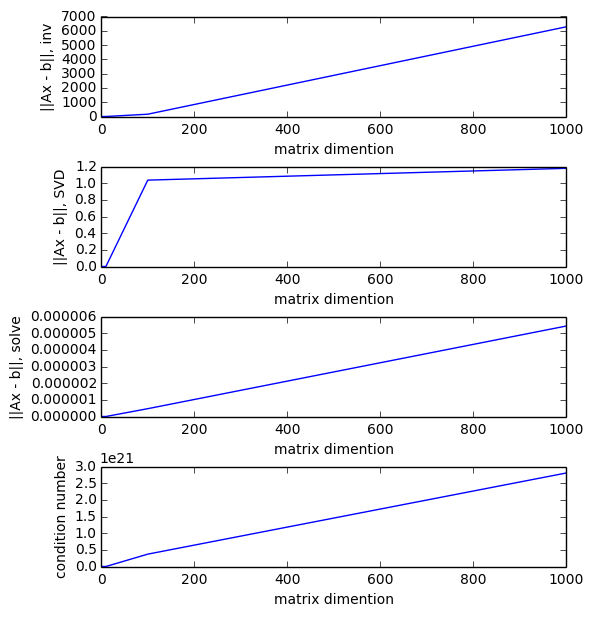

In [96]:
plt.subplots_adjust(top=1.5,hspace=0.5)
plt.subplot(411)
plt.xlabel('matrix dimention')
plt.ylabel('||Ax - b||, inv')
plt.plot(nn,e1)
plt.subplot(412)
plt.xlabel('matrix dimention')
plt.ylabel('||Ax - b||, SVD')
plt.plot(nn,e2)
plt.subplot(413)
plt.xlabel('matrix dimention')
plt.ylabel('||Ax - b||, solve')
plt.plot(nn,e3)
plt.subplot(414)
plt.xlabel('matrix dimention')
plt.ylabel('condition number')
plt.plot(nn,Ac)

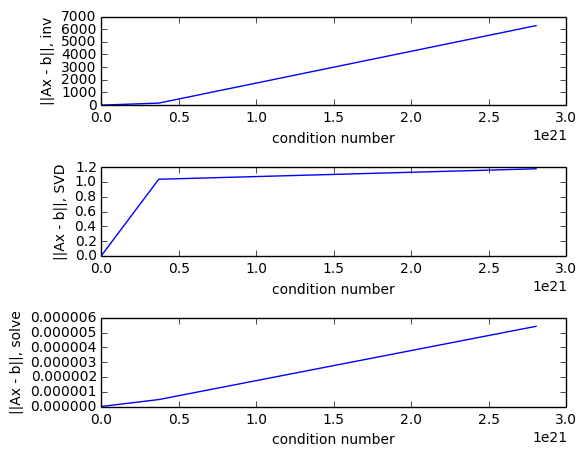

In [100]:
plt.subplots_adjust(top=1.1,hspace=0.7)
plt.subplot(311)
plt.xlabel('condition number')
plt.ylabel('||Ax - b||, inv')
plt.plot(Ac,e1)
plt.subplot(312)
plt.xlabel('condition number')
plt.ylabel('||Ax - b||, SVD')
plt.plot(Ac,e2)
plt.subplot(313)
plt.xlabel('condition number')
plt.ylabel('||Ax - b||, solve')
plt.plot(Ac,e3)